In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Властивість shape та метод reshape. Операції над масивами. Використати arange, random.

In [15]:
arr = np.random.rand(2, 3)
print(arr, arr.shape)

arr = arr.reshape((3, 2))
print(arr, arr.shape)

[[0.2003597  0.84215219 0.40135118]
 [0.76862446 0.03312664 0.84829806]] (2, 3)
[[0.2003597  0.84215219]
 [0.40135118 0.76862446]
 [0.03312664 0.84829806]] (3, 2)


In [16]:
arr[0][1] = 2e+12
print(arr)

[[2.00359698e-01 2.00000000e+12]
 [4.01351182e-01 7.68624460e-01]
 [3.31266371e-02 8.48298056e-01]]


In [18]:
np.arange(12, dtype=np.float32)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
      dtype=float32)

Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc, індексація з умовами відбору, групування, пошук «пустих» значень, сортування..);


In [21]:
df = pd.DataFrame.from_dict({"col1": np.arange(12), "col2": np.arange(12, 0, -1)})
df.head()

,col1,col2
0,0,12
1,1,11
2,2,10
3,3,9
4,4,8


In [22]:
df.describe()

,col1,col2
count,12.000000,12.000000
mean,5.500000,6.500000
std,3.605551,3.605551
min,0.000000,1.000000
25%,2.750000,3.750000
50%,5.500000,6.500000
75%,8.250000,9.250000
max,11.000000,12.000000


In [24]:
df.loc[1]

col1     1
col2    11
Name: 1, dtype: int64

In [31]:
df = pd.DataFrame(
    [[1, 2], [4, 5], [7, 8]],
    index=['cobra', 'viper', 'sidewinder'],
    columns=['max_speed', 'shield']
)
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [29]:
df.iloc[1:]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [30]:
df.iloc[[0, 2]]

,max_speed,shield
cobra,1,2
sidewinder,7,8


In [37]:
df.isnull().any()

max_speed    False
shield       False
dtype: bool

In [42]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [44]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [46]:
df.sort_values(by=['Max Speed'], ascending=False)

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
3,Parrot,26.0
2,Parrot,24.0


Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

In [54]:
def f(x):
    return 2 * x + 4

(array([ 4.        ,  5.05263158,  6.10526316,  7.15789474,  8.21052632,
         9.26315789, 10.31578947, 11.36842105, 12.42105263, 13.47368421,
        14.52631579, 15.57894737, 16.63157895, 17.68421053, 18.73684211,
        19.78947368, 20.84210526, 21.89473684, 22.94736842, 24.        ]),
 array([ 5.77472658,  3.40949451,  6.1147388 ,  9.20288107,  7.8233824 ,
         4.31412645, 10.28831798, 10.96052948, 14.20736848, 15.83877984,
        10.37248803, 19.32826453, 19.56547202, 21.78970964, 16.62936164,
        19.83586456, 23.08301811, 20.1121152 , 23.33786954, 25.59005538]))

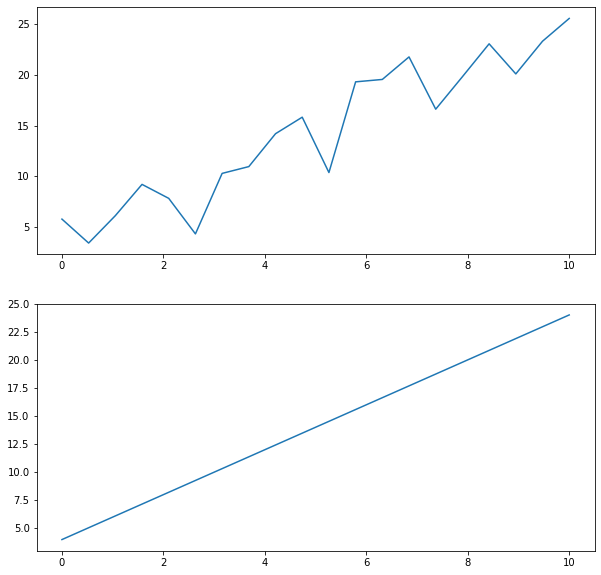

In [150]:
x = np.linspace(0, 10, 20)
y = f(x)
y_hat = y + 2.0 * np.random.normal(size=y.shape)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))
ax1.plot(x, y_hat)
ax2.plot(x, y)
y, y_hat

In [151]:
def mae(y, y_hat):
    return np.mean(np.absolute(y_hat - y))

def mse(y, y_hat):
    return np.mean(np.square(y_hat - y))

In [152]:
mae(y, y_hat)

1.924788748035413

In [153]:
mse(y, y_hat)

5.78622382771018

In [157]:
res = pd.DataFrame.from_dict({
    'x': x,
    'y': f(x),
    'y_hat': y_hat,
    'abs_err': np.abs(y - y_hat),
    'sqr_err': (y - y_hat) ** 2
})
res

,x,y,y_hat,abs_err,sqr_err
0,0.000000,4.000000,5.774727,1.774727,3.149654
1,0.526316,5.052632,3.409495,1.643137,2.699899
2,1.052632,6.105263,6.114739,0.009476,0.000090
3,1.578947,7.157895,9.202881,2.044986,4.181969
4,2.105263,8.210526,7.823382,0.387144,0.149880
5,2.631579,9.263158,4.314126,4.949031,24.492912
6,3.157895,10.315789,10.288318,0.027471,0.000755
7,3.684211,11.368421,10.960529,0.407892,0.166376
8,4.210526,12.421053,14.207368,1.786316,3.190924
9,4.736842,13.473684,15.838780,2.365096,5.593677


In [158]:
res.to_csv('./results.csv')